# Desarrollo de aplicaciones avanzadas de ciencias computacionales

#### TC3002B.201: IA
Ramona Najera, A01423596


<br>
<table>
  <tr>
    <th>Avance 1</th>
    <th>Avance 2</th>
  </tr>
  <tr>
    <td>- Obtener, generar, aumentar dataset <br><br>
        - Separación training y test <br><br>
        - Técnicas de escalamiento <br><br>
        - Preprocesado de datos
    </td>
    <td>- Estado del arte <br><br>
        - Métricas <br><br>
        - Interpretación de resultados
    </td>
  </tr>
</table>
<br>

In [1]:
# Conexión por google drive para obtener archivos de entrada
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Magic functions (interactúa con el servidor)
%cd '/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite'
!ls

/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite
Index  sat.doc	sat.trn  sat.tst


# Statlog project

### Initial Dataset
🗃 [Landstat Satellite](https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite) (Climate & environment)

- 4435 training instances 🦾 <br>
- 2000 testing instances 📊 <br><br>

### Task: Classification
- 36 attributes (4 spectral bands x 9 pixels)
- Numerical attributes (between 0 and 255)
- 7 class labels (with no data for class 6)

In [3]:
class_names = ['red soil',                     # 1 → 0
               'cotton crop',                  # 2 → 1
               'grey soil',                    # 3 → 2
               'damp grey soil',               # 4 → 3
               'soil with vegetation stubble', # 5 → 4
               #'mixture class',               # 6 (NO DATA)
               'very damp grey soil']          # 7 → 5

In [4]:
print("🔍 DATASET PREVIEW\n  - 36 numbers for the pixels\n  - One for the class label\n")

with open("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn", 'r') as train_file:
  info = train_file.readline().strip('\n').split(" ")

  print(len(info),"elems per line of info\n")

  print(info[:-1])
  print(info[-1])

🔍 DATASET PREVIEW
  - 36 numbers for the pixels
  - One for the class label

37 elems per line of info

['92', '115', '120', '94', '84', '102', '106', '79', '84', '102', '102', '83', '101', '126', '133', '103', '92', '112', '118', '85', '84', '103', '104', '81', '102', '126', '134', '104', '88', '121', '128', '100', '84', '107', '113', '87']
3


### Feature scaling and preprocessing
1. Separate class label from pixels info
2. Class numbers will go from 0 to 5 to match `class_names` index
3. Remove unused class
4. Pixels will go from 0 to 1

In [5]:
import numpy as np

def obtain_data(filename):
  img_arr = []
  label_arr = []

  with open(filename, 'r') as data_file:
    for line in data_file:
      info = line.split(" ")

      # Last number is class label
      label_arr.append(int(info[-1]) - 1)

      # Remove extra class
      if label_arr[-1] == 6:
        label_arr[-1] = 5

      # Construct image
      pixels = []
      for pixel in info[:-1]:
        pixels.append((int(pixel) / 255.0))

      # 4 arrays (one per spectral band)
      img_arr.append(np.array_split(np.array(pixels), 4))

      # 6 arrays (for a square image)
      #img_arr.append(np.array_split(np.array(pixels), 6)) # PREGUNTA

      #img_arr.append(pixels) # PREGUNTA

  img_arr = np.array(img_arr)
  label_arr = np.array(label_arr).astype(np.uint8)

  print(img_arr[0],"\n")
  print(label_arr)

  return(img_arr, label_arr)

In [6]:
print("🦾 OBTAINING TRAIN INFO...\n")
train_images, train_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn")

print("\n📊 OBTAINING TEST INFO...\n")
test_images, test_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.tst")

🦾 OBTAINING TRAIN INFO...

[[0.36078431 0.45098039 0.47058824 0.36862745 0.32941176 0.4
  0.41568627 0.30980392 0.32941176]
 [0.4        0.4        0.3254902  0.39607843 0.49411765 0.52156863
  0.40392157 0.36078431 0.43921569]
 [0.4627451  0.33333333 0.32941176 0.40392157 0.40784314 0.31764706
  0.4        0.49411765 0.5254902 ]
 [0.40784314 0.34509804 0.4745098  0.50196078 0.39215686 0.32941176
  0.41960784 0.44313725 0.34117647]] 

[2 2 2 ... 3 3 3]

📊 OBTAINING TEST INFO...

[[0.31372549 0.4        0.4        0.30980392 0.29803922 0.4
  0.4        0.30980392 0.29803922]
 [0.4        0.41568627 0.3254902  0.29803922 0.38823529 0.42352941
  0.33333333 0.29803922 0.40392157]
 [0.4627451  0.34509804 0.31372549 0.41960784 0.4627451  0.34509804
  0.30980392 0.41960784 0.42745098]
 [0.34117647 0.30980392 0.41960784 0.42745098 0.34117647 0.30980392
  0.41960784 0.44313725 0.34117647]] 

[2 2 3 ... 4 4 4]


In [ ]:
"""
import matplotlib.pyplot as plt

examples = 6
types = set()

# 🔍 CLASS EXAMPLE PREVIEW
for i in range(len(train_labels)):
  if not examples:
    break

  if train_labels[i] not in types:
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[i])

    #plt.colorbar()
    plt.title(f'{class_names[train_labels[i]]} ({train_labels[i]})')

    plt.show()

    types.add(train_labels[i])
    examples = examples - 1
"""

In [13]:
import tensorflow as tf

# Helper libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Simple model multilayer perceptron (neural network)
model  =  Sequential([ # Conectado en orden
                    Flatten(input_shape=train_images[0].shape), # Matrices se vuelven una sola línea
                    # Neuronas intermedias
                    Dense(128, activation='relu'),
                    Dense(67, activation='relu'),
                    Dense(6, activation='softmax') # Neuronas de salida (# de clases)
          ])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 67)             │         8,643 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,787 (53.86 KB)

 Trainable params: 13,787 (53.86 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile model with an optimiser, loss function and metric
model.compile(optimizer="adam", # Forma de gradiente descendiente
              loss="sparse_categorical_crossentropy", # Presentación del error
              metrics =['accuracy']) # Evaluación del comportamiento

# Entrena con datos, respuestas y épocas
history = model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3055 - loss: 1.6569
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6216 - loss: 1.1087
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7989 - loss: 0.7474
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8094 - loss: 0.6020
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8260 - loss: 0.5104
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8243 - loss: 0.4800
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.4596
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.4502
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 0.4430
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.4443
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.4201
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [15]:
accuracy = 0.8765 # Actualizar aquí con la accuracy resultante

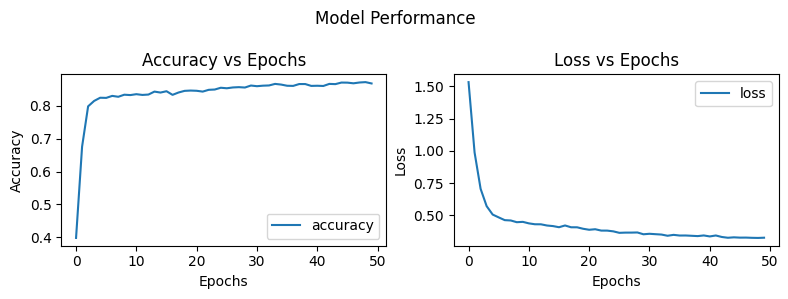

In [16]:
import pandas as pd

# Load history into dataframe to analyze learning performance
df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Model Performance')

acc_vs_epochs = df.plot(y="accuracy", title="Accuracy vs Epochs", legend=True, ax=ax1)
acc_vs_epochs.set(xlabel="Epochs", ylabel="Accuracy")

loss_vs_epochs = df.plot(y="loss", title = "Loss vs Epochs",legend=True, ax=ax2)
loss_vs_epochs.set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc) # Overfitting: gap between traing acc and test acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8560 - loss: 0.3638

Test accuracy: 0.8579999804496765


In [18]:
# Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()]) # Model linear outputs are transformed into probabilities

predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("\n1st prediction\n", predictions[0])
print("\nHighest confidence value:", predicted_labels[0])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

1st prediction
 [0.13659696 0.13238768 0.32364714 0.1416305  0.13260242 0.13313523]

Highest confidence value: 2


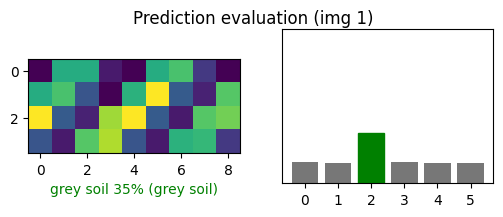

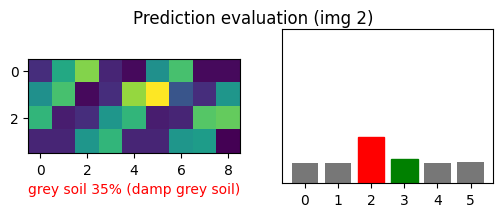

In [19]:
# Verify predictions
def plot_comparison(idx):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
  fig.suptitle(f"Prediction evaluation (img {idx})")

  plt.subplot(1,2,1)
  plt.imshow(test_images[idx])

  if predicted_labels[idx] == test_labels[idx]:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_labels[idx]]} {int(100*np.max(predictions))}% ({class_names[test_labels[idx]]})", color=color)

  plt.subplot(1,2,2)
  plt.xticks(range(len(class_names)))
  plt.yticks([])

  prediction_plt = plt.bar(range(len(class_names)), predictions[idx], color="#777777")
  plt.ylim([0, 1])

  prediction_plt[predicted_labels[idx]].set_color('red')
  prediction_plt[test_labels[idx]].set_color('green')

plot_comparison(1)
plot_comparison(2)

In [69]:
from tabulate import tabulate

# Confusion matrix
count_predictions = []
headers = ['↓ True vs Predicted →', '0', '1', '2', '3', '4', '5', '↓ Total ↓']

for i in range(len(class_names)):
  count_predictions.append([0 for i in range(len(class_names) + 2)])
  count_predictions[i][0] = i

for i in range(len(test_labels)):
  count_predictions[test_labels[i]][predicted_labels[i] + 1] += 1
  count_predictions[test_labels[i]][7] += 1

print(tabulate(count_predictions, headers))

  ↓ True vs Predicted →    0    1    2    3    4    5    ↓ Total ↓
-----------------------  ---  ---  ---  ---  ---  ---  -----------
                      0  445    0    8    0    8    0          461
                      1    0  213    0    1   10    0          224
                      2    2    1  376   15    0    3          397
                      3    0    1   41   62    7  100          211
                      4    4    9    1    3  210   10          237
                      5    0    1    9   35   15  410          470


> Fin del 1er avance: 6 de abril del 2025

In [59]:
# Comprobación
from tensorflow.math import confusion_matrix

prediction_matrix = confusion_matrix(test_labels, predicted_labels).numpy()

print(tabulate(prediction_matrix, headers[1:]))

  0    1    2    3    4    5
---  ---  ---  ---  ---  ---
445    0    8    0    8    0
  0  213    0    1   10    0
  2    1  376   15    0    3
  0    1   41   62    7  100
  4    9    1    3  210   10
  0    1    9   35   15  410


### Base metrics

- **Accuracy** (overall correctness of a model) <br>
  `(TP + TN) / Todo`
- **Precision** (accuracy of positive predictions) <br>
  `TP / (TP + FP)`
- **Recall** (how well the model identifies positive instances) <br>
  `TP / (TP + FN)`
- **F1** (represents precision and recall in a single value) <br>
  `Precision * Recall / (Precision * Recall)`
- **MCC** (considers all elements of the confusion matrix) <br>
  `(TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))`

In [38]:
print(f"TRAIN ACC vs TEST ACC\n{accuracy} ↔ {test_acc}")

TRAIN ACC vs TEST ACC
0.8765 ↔ 0.8579999804496765


In [68]:
# TRABAJO EN PROCESO

for i in range(len(class_names)):
  count_predictions.append([0 for i in range(len(class_names) + 2)])
  count_predictions[i][0] = i

for i in range(len(test_labels)):
  count_predictions[test_labels[i]][predicted_labels[i] + 1] += 1
  count_predictions[test_labels[i]][7] += 1

Total = np.sum(prediction_matrix)
TP = 0
TN = 0
FP = 0
FN = 0



In [ ]:
# TRABAJO EN PROCESO

# 1st model evaluation
h = ["Accuracy", "Precision", "Recall", "F1"]
m1 = [test_acc]

print(tabulate(m1, h))

### Observaciones importantes

#### Train vs test accuracy
1. La primera versión de este modelo es overfitting, pues la accuracy del training es mayor a la que se obtiene una vez que se prueba

#### Matriz de confusión
1. Las clases con más instancias (0 y 5) tienen más del doble de registros que las de menos (3 y 1)
2. La 3ra clase es la que menos intancias predecidas correctamente tiene
- Es confundida en su mayoría por las clases 2 y 5
- Es la clase con menos instancias

> Fin del 2do avance: 13 de abril del 2025

In [72]:
# TRABAJO EN PROCESO

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model2 = models.Sequential()
model2.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
